<a href="https://colab.research.google.com/github/Rashid-25/Python_Practice_beginner/blob/main/titanic_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

In [3]:

# Display the first few rows of the dataset
print(titanic.head())

# Get a summary of the dataset
print(titanic.info())

# Get descriptive statistics for numerical columns
print(titanic.describe())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [4]:

# Check for missing values
print(titanic.isnull().sum())

# You can drop rows with missing values or fill them
# For example, filling missing ages with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Dropping 'deck' which might have too many missing values
titanic.drop('deck', axis=1, inplace=True, errors='ignore')

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


<ipython-input-4-edc3980ea67e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [5]:

survival_rate = titanic['survived'].mean()
print(f'Survival Rate: {survival_rate:.2f}')

Survival Rate: 0.38


In [6]:

survival_by_gender = titanic.groupby('sex')['survived'].mean()
print(survival_by_gender)

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


In [7]:

survival_by_class = titanic.groupby('class')['survived'].mean()
print(survival_by_class)

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


<ipython-input-7-f62d14e5cc4c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class = titanic.groupby('class')['survived'].mean()


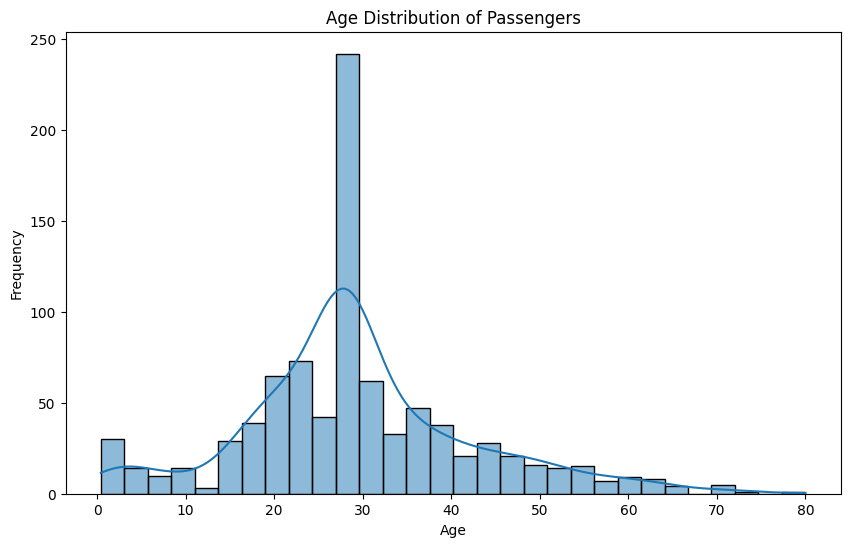

In [8]:

plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

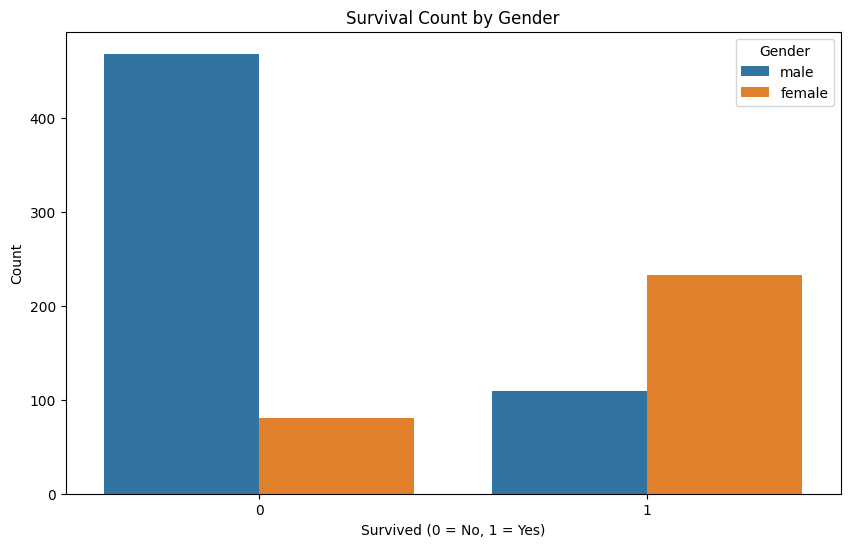

In [9]:

plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='survived', hue='sex')
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

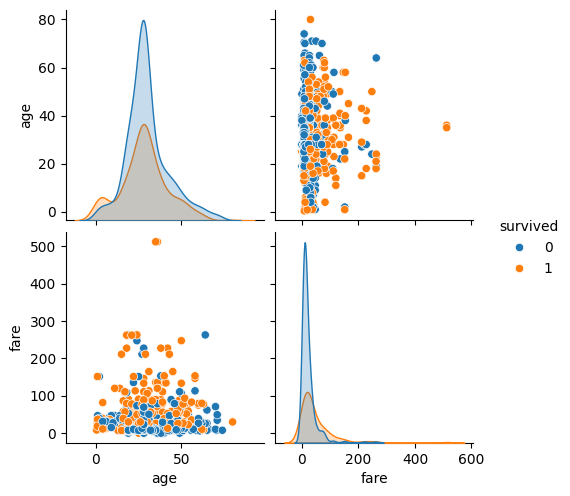

In [12]:

sns.pairplot(titanic, hue='survived', vars=['age', 'fare'], diag_kind='kde')
plt.show()